In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import folium
from sklearn import preprocessing
import geopandas as gpd
import matplotlib.colors as colors
import matplotlib.colors as colors
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
#from helpers import *
from ipywidgets import SelectMultiple, RadioButtons, interact, Layout
%load_ext autoreload
%autoreload 2

## Trade Network

In [11]:
import networkx as nx

In [12]:
mat = pd.read_pickle("pickle/trade_matrix.pkl")

In [13]:
china = mat[(mat.reset_index().From=='China').values]

In [16]:
china = mat[(mat.reset_index().From=='China').values]
china = china.mean(axis=1)
china = china.reset_index().set_index(['From', 'To'])
china = china.rename(columns={0:"Value"})

In [17]:
china = china.sort_values(['Value'], ascending=False)

In [18]:
top50cn = china.iloc[:50]

In [19]:
countries = set(top50cn.reset_index().From.values).union(top50cn.reset_index().To.values)

In [20]:
G = nx.DiGraph()

In [21]:
G.add_nodes_from(countries)

In [22]:
G.add_weighted_edges_from(top50cn.reset_index().values)

In [23]:
sum_from = mat.groupby('From').sum()
sum_to = mat.groupby('To').sum()
tot = sum_from.merge(sum_to.Value, how='outer', left_index=True, right_index=True).sum(axis=1).sort_values(ascending=False)
#color = tot.divide(tot.max())

AttributeError: 'DataFrame' object has no attribute 'Value'

In [24]:
data = top50cn.Value.reset_index().drop('From', axis=1).set_index('To')
to = pd.Series(data['Value'], index=data.index)

In [26]:
#nx.set_node_attributes(G, tot, 'Total')
nx.set_node_attributes(G, to, 'To')

In [29]:
china

Value
From  To                                    
China Japan                     5.459678e+06
      United States of America  2.803125e+06
      South Korea               2.105190e+06
      Indonesia                 1.034664e+06
      Germany                   9.767392e+05
...                                      ...
      Burundi                   2.683389e+03
      Djibouti                  2.611944e+03
      Nicaragua                 2.563194e+03
      Belize                    2.555083e+03
      Vanuatu                   1.783750e+03

[129 rows x 1 columns]

In [27]:
m = max([G[u][v]['weight'] for u,v in G.edges()])
mto = max([G.nodes[n]["To"] for n in G.nodes()])
#[G[u][v]['weight']/m*100 for u,v in G.edges()]

KeyError: 'To'

C:\Users\Francesco\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Francesco\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


KeyError: 'To'

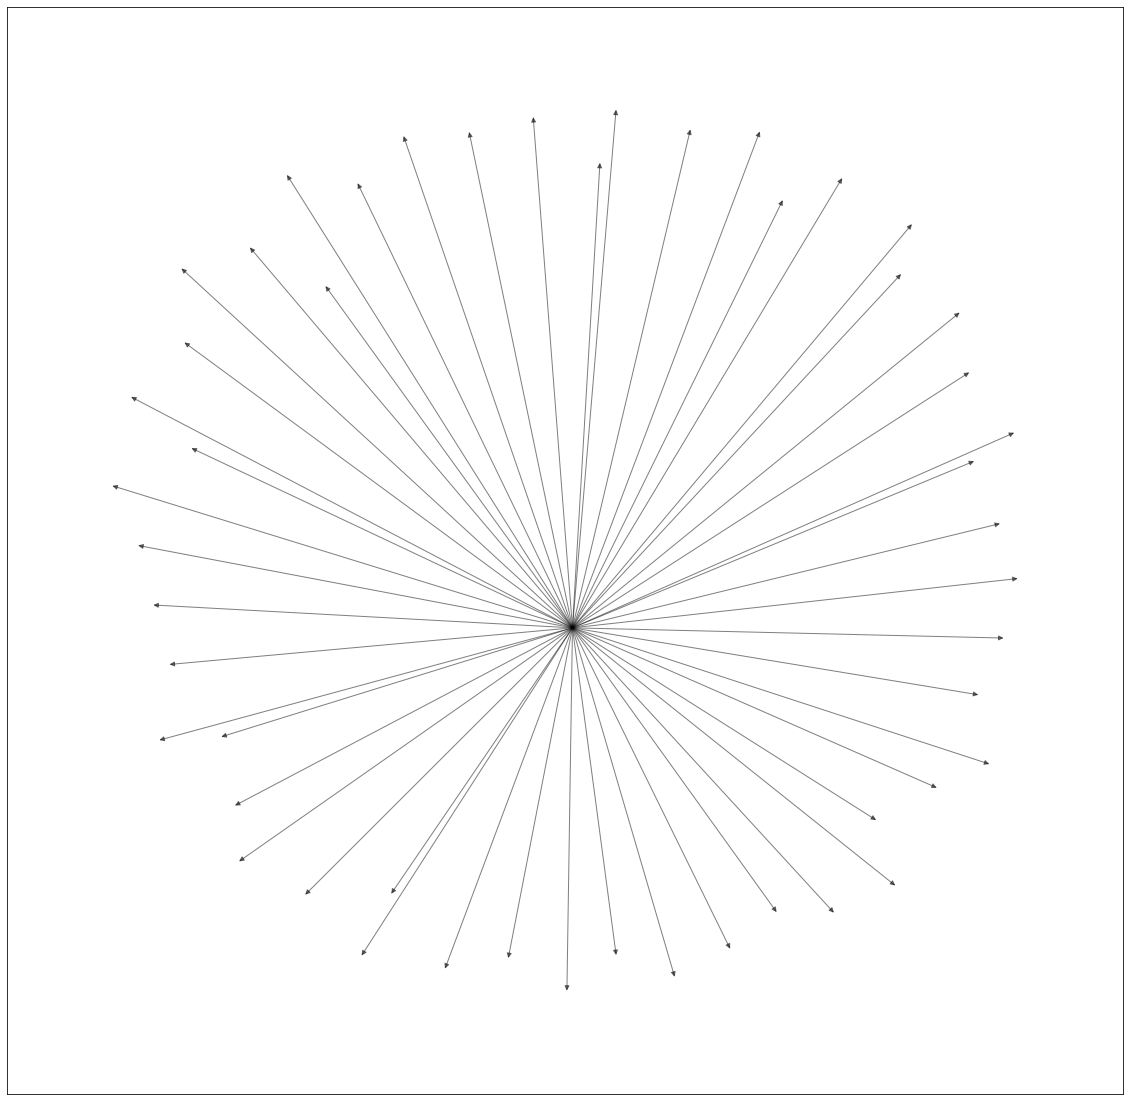

In [28]:
plt.figure(figsize=(20,20)) 
pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.5,edgelist=G.edges(), width=1, with_labels=True)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), with_labels=True, node_color=[G.nodes[n]["To"] for n in G.nodes()],
                            node_size=[G.nodes[n]["To"] for n in G.nodes()]/mto*5000, alpha=0.8, node_shape = '.')
labels = nx.draw_networkx_labels(G,pos)
plt.colorbar(nc)
plt.axis('off')
plt.show()

# USA

In [231]:
usa = mat[(mat.reset_index().From=='United States of America').values]

In [232]:
usa = usa.sort_values(['Value'], ascending=False)

In [233]:
top50us = usa.iloc[:50]

In [234]:
countries = set(top50us.reset_index().From.values).union(top50us.reset_index().To.values)

In [235]:
US = nx.DiGraph()

In [236]:
US.add_nodes_from(countries)

In [237]:
US.add_weighted_edges_from(top50us.reset_index().values)

In [238]:
sum_from = mat.groupby('From').sum()
sum_to = mat.groupby('To').sum()
tot = sum_from.merge(sum_to.Value, how='outer', left_index=True, right_index=True).sum(axis=1).sort_values(ascending=False)
#color = tot.divide(tot.max())

In [239]:
data = top50us.Value.reset_index().drop('From', axis=1).set_index('To')
to = pd.Series(data['Value'], index=data.index).append(pd.Series([0], index=['United States of America']))

In [240]:
nx.set_node_attributes(US, tot, 'Total')
nx.set_node_attributes(US, to, 'To')

In [241]:
m = max([US[u][v]['weight'] for u,v in US.edges()])
mto = max([US.nodes[n]['To'] for n in US.nodes()])
#[G[u][v]['weight']/m*100 for u,v in G.edges()]

# Italy

In [244]:
ita = mat[(mat.reset_index().From=='Italy').values]

In [245]:
ita = ita.sort_values(['Value'], ascending=False)

In [246]:
top50it = ita.iloc[:50]

In [247]:
countries = set(top50it.reset_index().From.values).union(top50it.reset_index().To.values)

In [248]:
IT = nx.DiGraph()

In [252]:
IT.add_nodes_from(countries)

In [253]:
IT.add_weighted_edges_from(top50it.reset_index().values)

In [254]:
sum_from = mat.groupby('From').sum()
sum_to = mat.groupby('To').sum()
tot = sum_from.merge(sum_to.Value, how='outer', left_index=True, right_index=True).sum(axis=1).sort_values(ascending=False)
#color = tot.divide(tot.max())

In [255]:
data = top50it.Value.reset_index().drop('From', axis=1).set_index('To')
to = pd.Series(data['Value'], index=data.index).append(pd.Series([0], index=['Italy']))

In [256]:
nx.set_node_attributes(IT, tot, 'Total')
nx.set_node_attributes(IT, to, 'To')

In [257]:
m = max([IT[u][v]['weight'] for u,v in IT.edges()])
mto = max([IT.nodes[n]['To'] for n in IT.nodes()])
#[G[u][v]['weight']/m*100 for u,v in G.edges()]

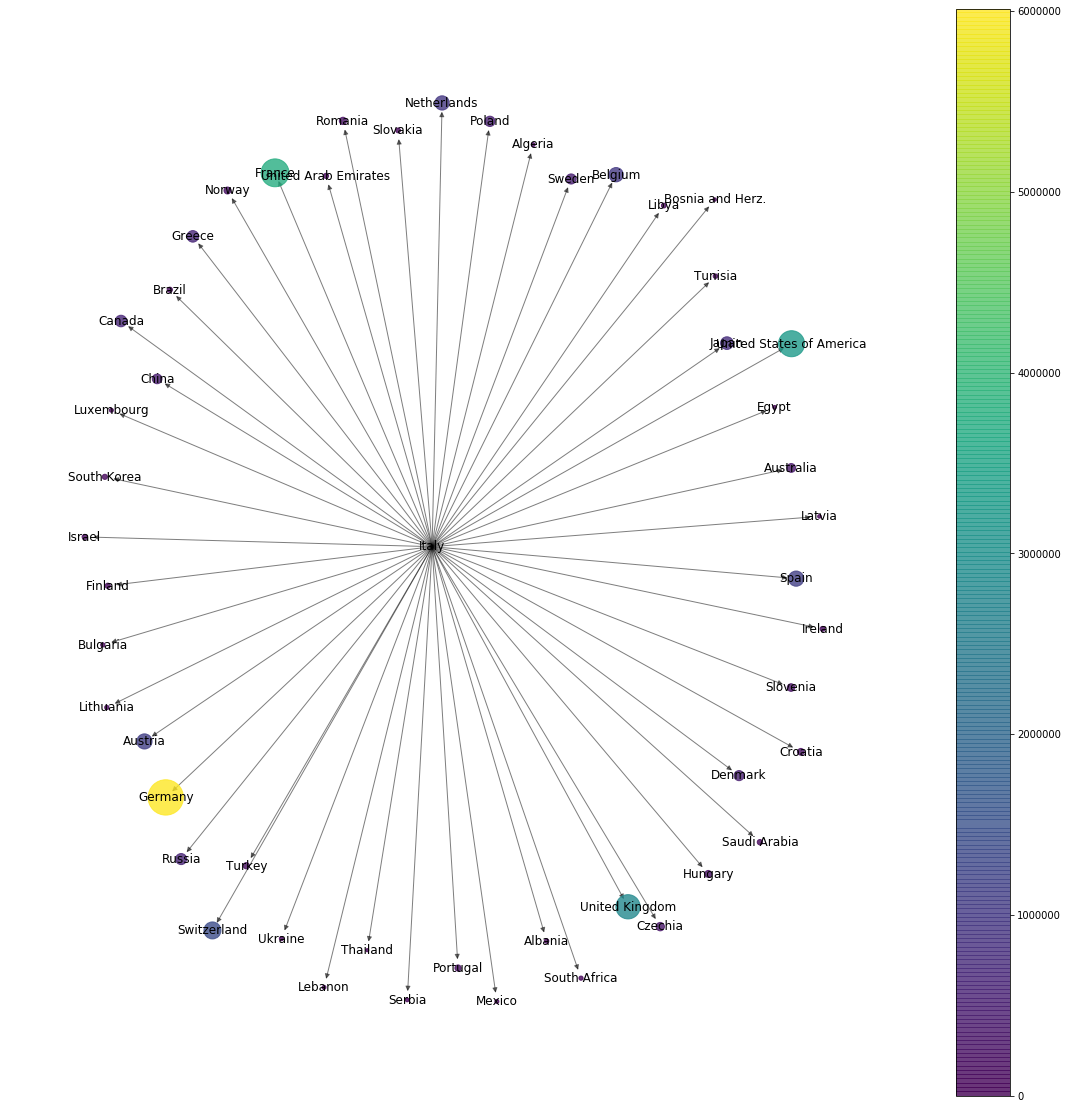

In [258]:
plt.figure(figsize=(20,20)) 
pos = nx.spring_layout(IT)
ec = nx.draw_networkx_edges(IT, pos, alpha=0.5,edgelist=IT.edges(), width=1, with_labels=True)
nc = nx.draw_networkx_nodes(IT, pos, nodelist=IT.nodes(), with_labels=True, node_color=[IT.nodes[n]["To"] for n in IT.nodes()],
                            node_size=[IT.nodes[n]["To"] for n in IT.nodes()]/mto*5000, alpha=0.8, node_shape = '.')
labels = nx.draw_networkx_labels(IT,pos)
plt.colorbar(nc)
plt.axis('off')
plt.show()

# YOUR COUNTRY

In [441]:
country='Italy'

In [442]:
yc = mat[(mat.reset_index().From==country).values].sort_values(['Value'], ascending=False)
top50yc = yc.iloc[:50]
countries = set(top50yc.reset_index().From.values).union(top50yc.reset_index().To.values)

In [443]:
sum_from = mat.groupby('From').sum()
sum_to = mat.groupby('To').sum()
tot = sum_from.merge(sum_to.Value, how='outer', left_index=True, right_index=True).sum(axis=1).sort_values(ascending=False)
#color = tot.divide(tot.max())

In [444]:
YC = nx.DiGraph()
YC.add_nodes_from(countries)
YC.add_weighted_edges_from(top50yc.reset_index().values)

In [445]:
data = top50yc.Value.reset_index().drop('From', axis=1).set_index('To')
to = pd.Series(data['Value'], index=data.index)
try:
    to[country]
except:
    to = to.append(pd.Series([0], index=[country]))

In [446]:
nx.set_node_attributes(YC, tot, 'Total')
nx.set_node_attributes(YC, to, 'To')

In [447]:
m = max([YC[u][v]['weight'] for u,v in YC.edges()])
mto = max([YC.nodes[n]['To'] for n in YC.nodes()])
#[G[u][v]['weight']/m*100 for u,v in G.edges()]

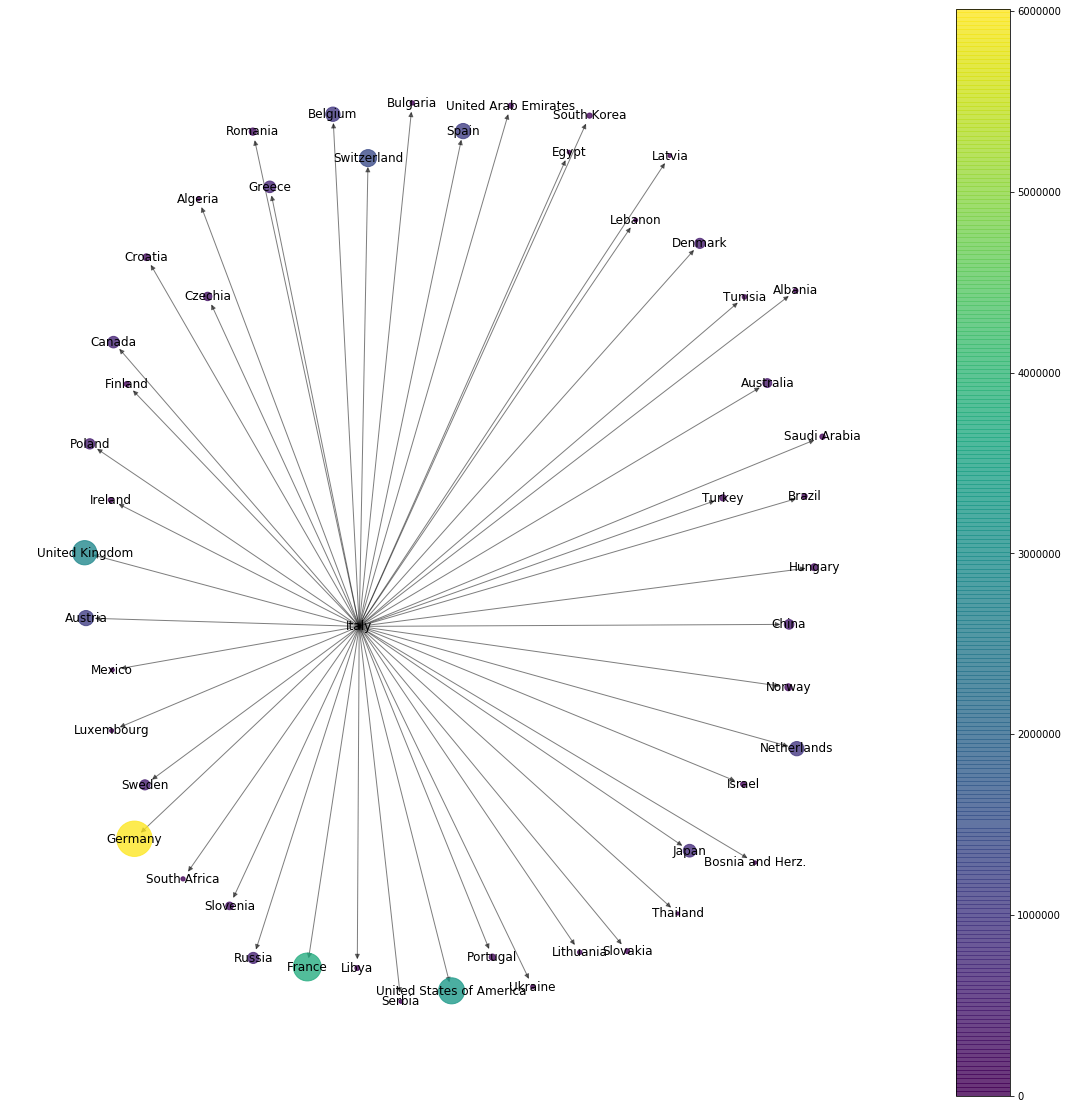

In [448]:
plt.figure(figsize=(20,20)) 
pos = nx.spring_layout(YC)
ec = nx.draw_networkx_edges(YC, pos, alpha=0.5,edgelist=YC.edges(), width=1, with_labels=True)
nc = nx.draw_networkx_nodes(YC, pos, nodelist=YC.nodes(), with_labels=True, node_color=[YC.nodes[n]["To"] for n in YC.nodes()],
                            node_size=[YC.nodes[n]["To"] for n in YC.nodes()]/mto*5000, alpha=0.8, node_shape = '.')
labels = nx.draw_networkx_labels(YC,pos)
plt.colorbar(nc)
plt.axis('off')
plt.show()

In [449]:
yc = mat[(mat.reset_index().To==country).values].sort_values(['Value'], ascending=False)
top50yc = yc.iloc[:50]
countries = set(top50yc.reset_index().From.values).union(top50yc.reset_index().To.values)

In [450]:
YC = nx.DiGraph()
YC.add_nodes_from(countries)
YC.add_weighted_edges_from(top50yc.reset_index().values)

In [451]:
data = top50yc.Value.reset_index().drop('To', axis=1).set_index('From')
fro = pd.Series(data['Value'], index=data.index)
try:
    fro[country]
except:
    fro = fro.append(pd.Series([0], index=[country]))

In [452]:
nx.set_node_attributes(YC, tot, 'Total')
nx.set_node_attributes(YC, fro, 'From')

In [453]:
m = max([YC[u][v]['weight'] for u,v in YC.edges()])
mto = max([YC.nodes[n]['From'] for n in YC.nodes()])
#[G[u][v]['weight']/m*100 for u,v in G.edges()]

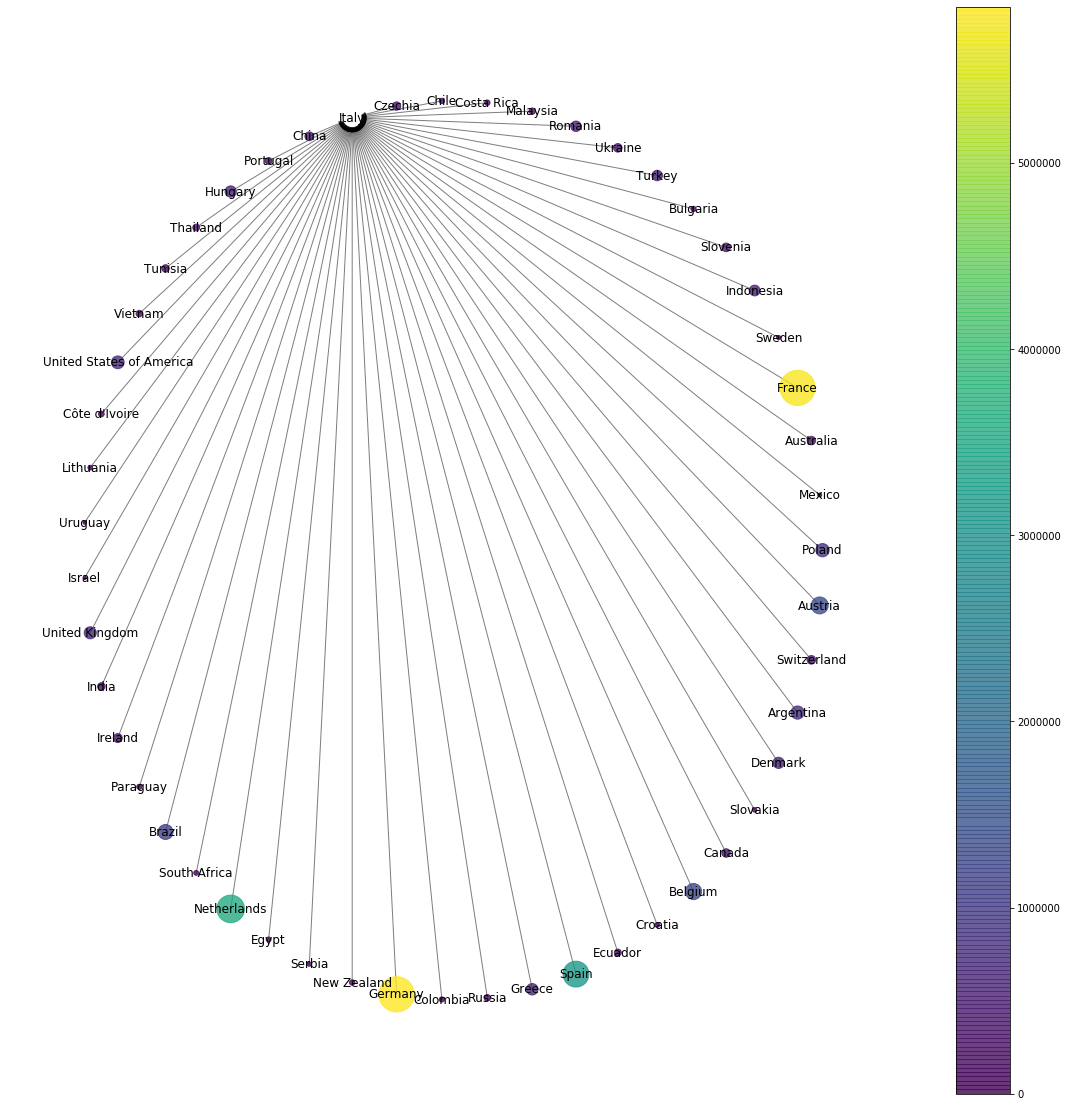

In [460]:
plt.figure(figsize=(20,20)) 
pos = nx.shell_layout(YC)
ec = nx.draw_networkx_edges(YC, pos, alpha=0.5,edgelist=YC.edges(), width=1, with_labels=True)
nc = nx.draw_networkx_nodes(YC, pos, nodelist=YC.nodes(), with_labels=True, node_color=[YC.nodes[n]["From"] for n in YC.nodes()],
                            node_size=[YC.nodes[n]["From"] for n in YC.nodes()]/mto*5000, alpha=0.8, node_shape = '.')
labels = nx.draw_networkx_labels(YC,pos)
plt.colorbar(nc)
plt.axis('off')
plt.show()

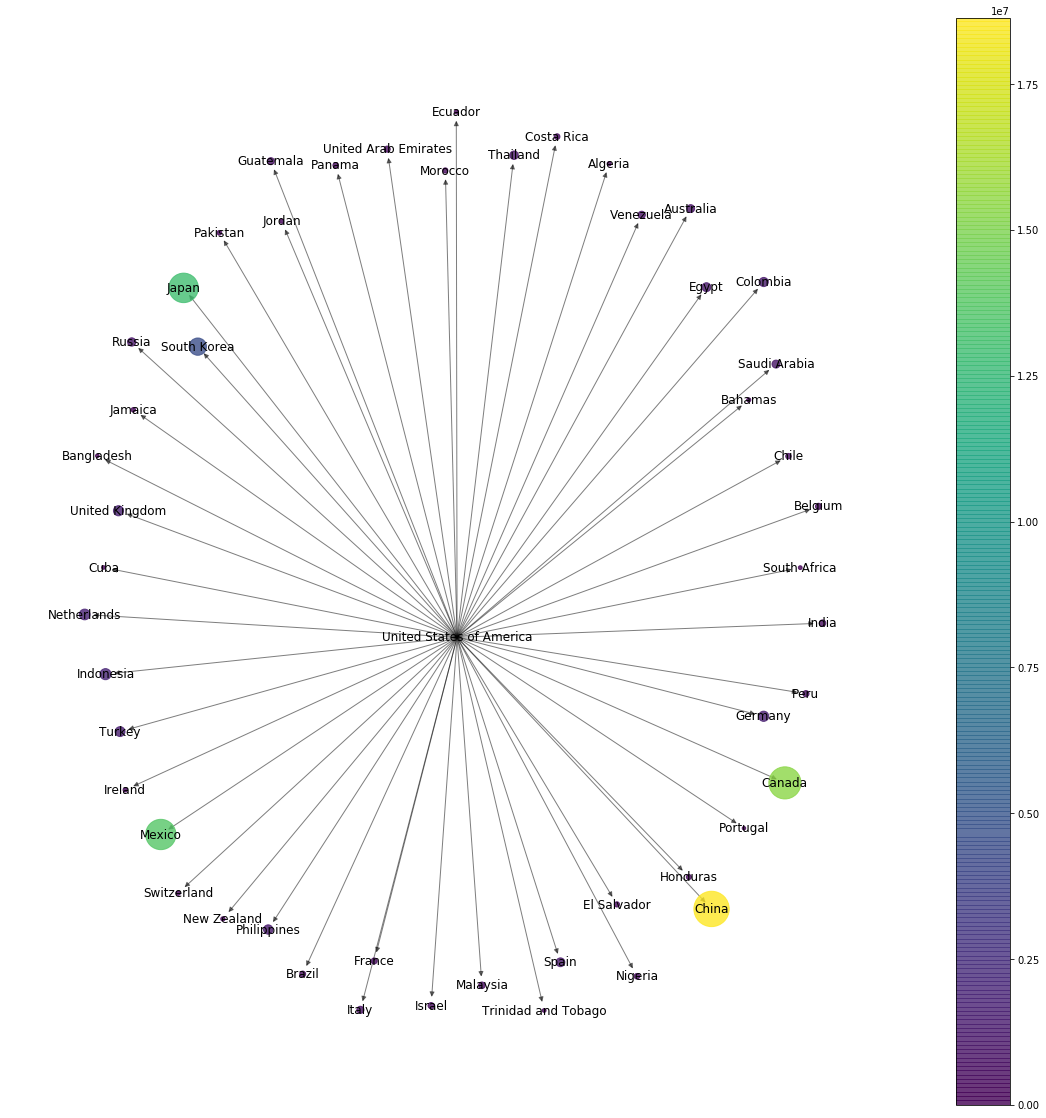

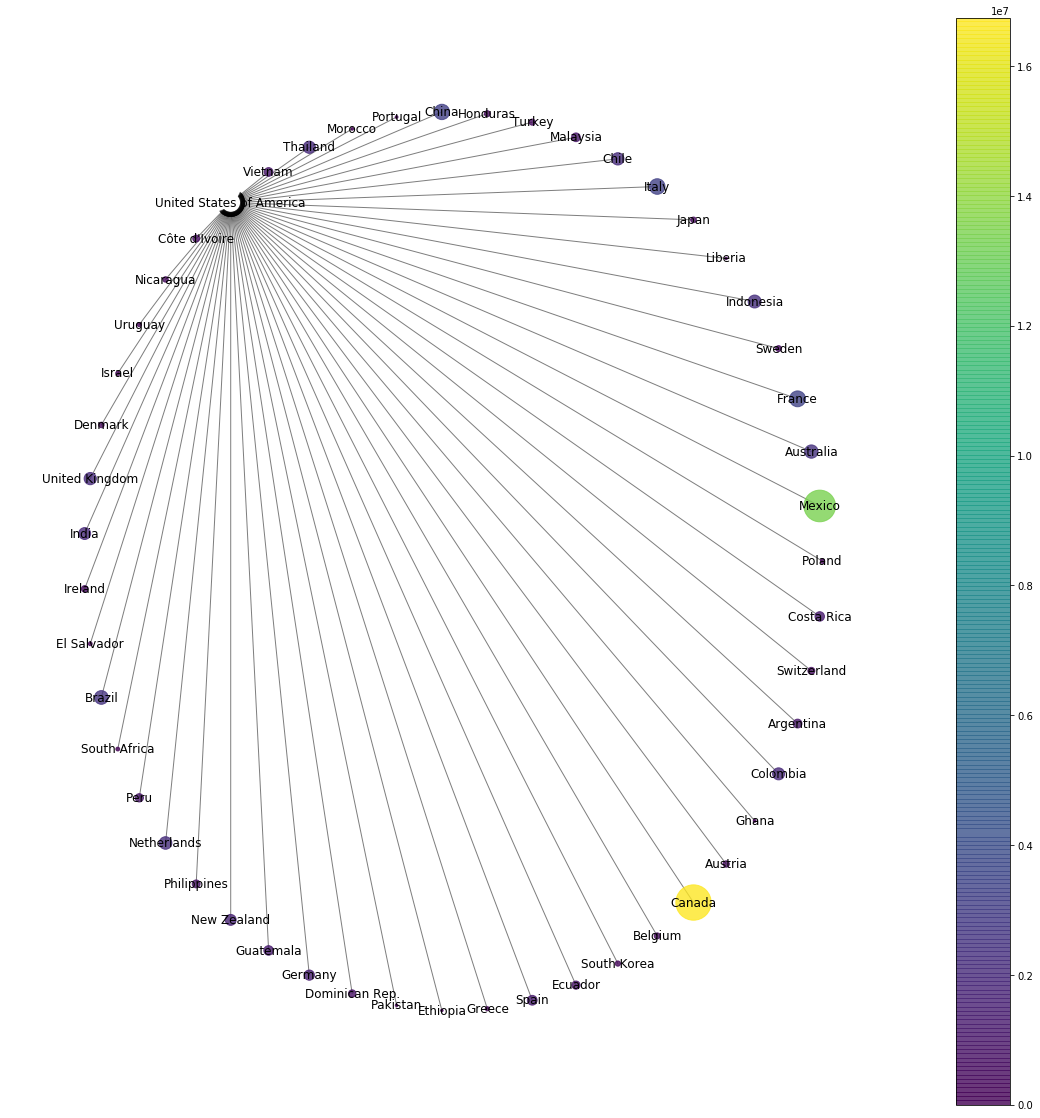

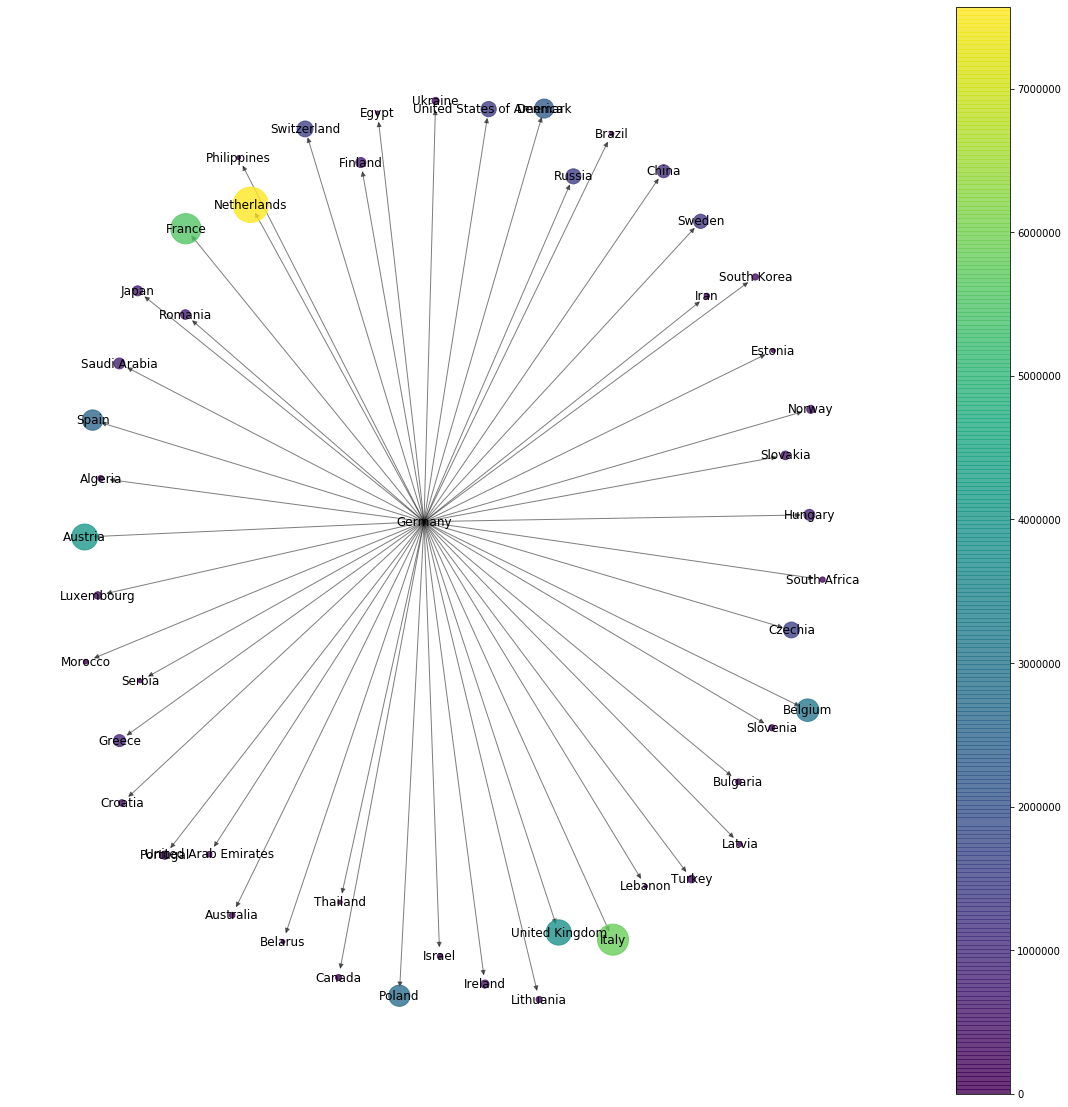

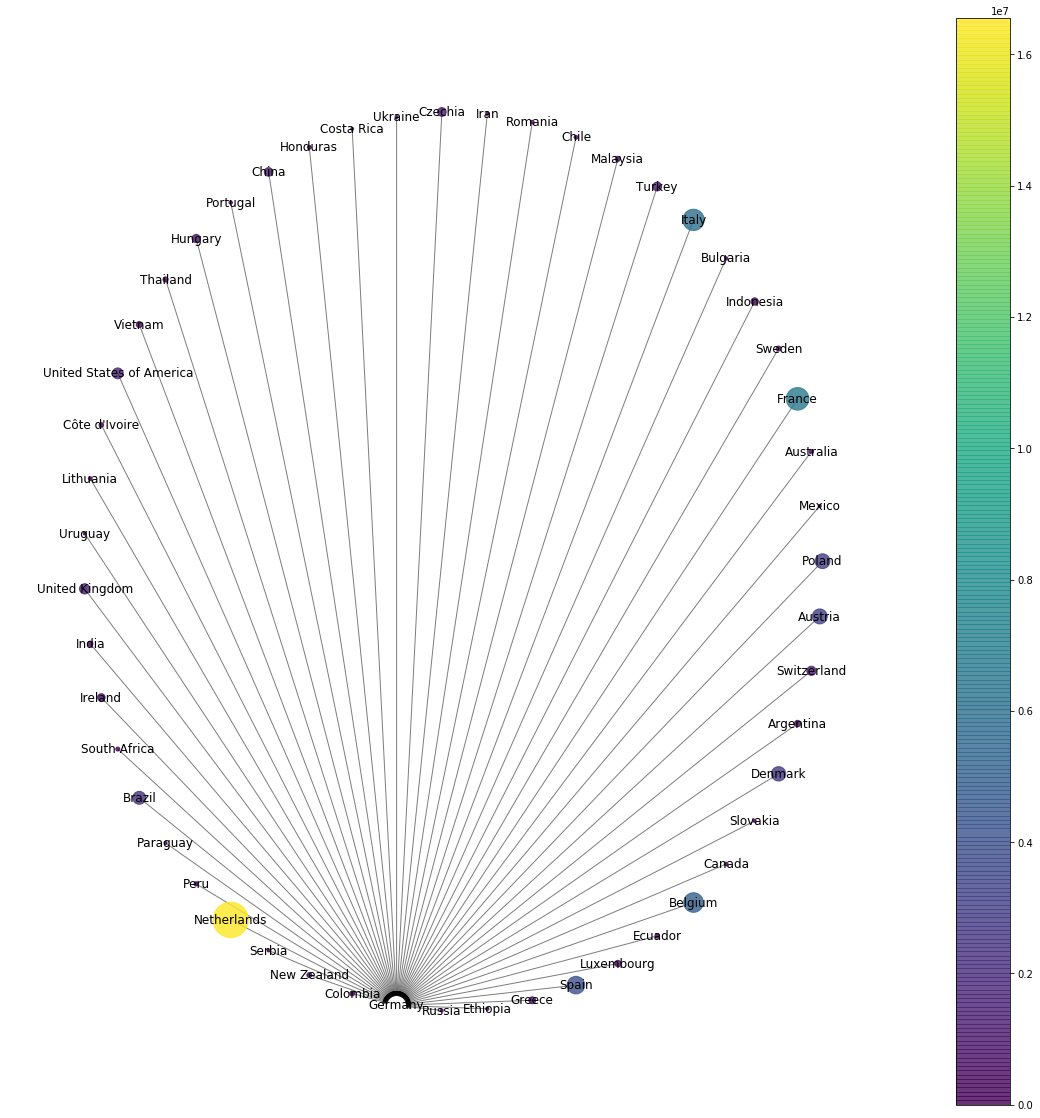

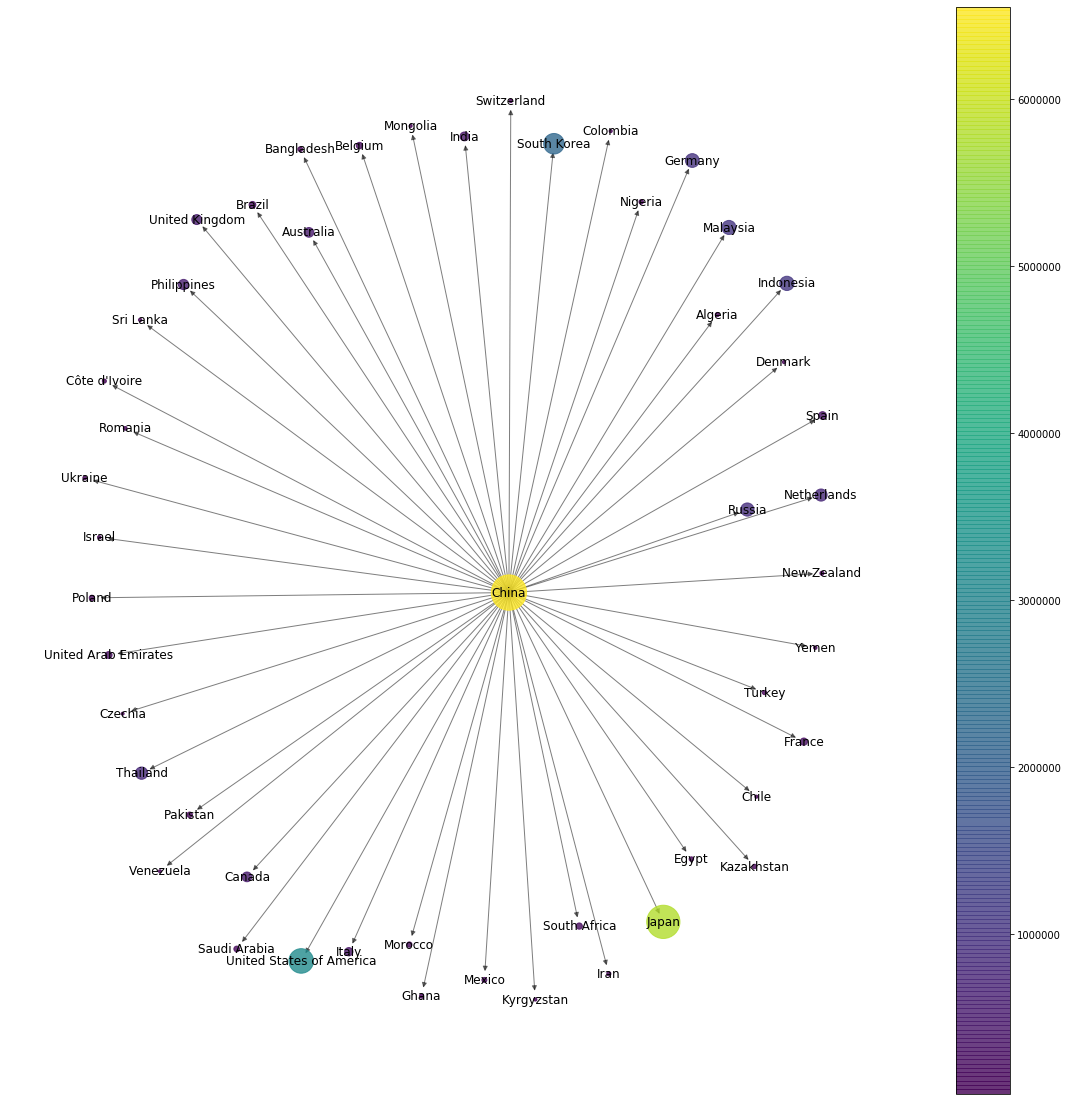

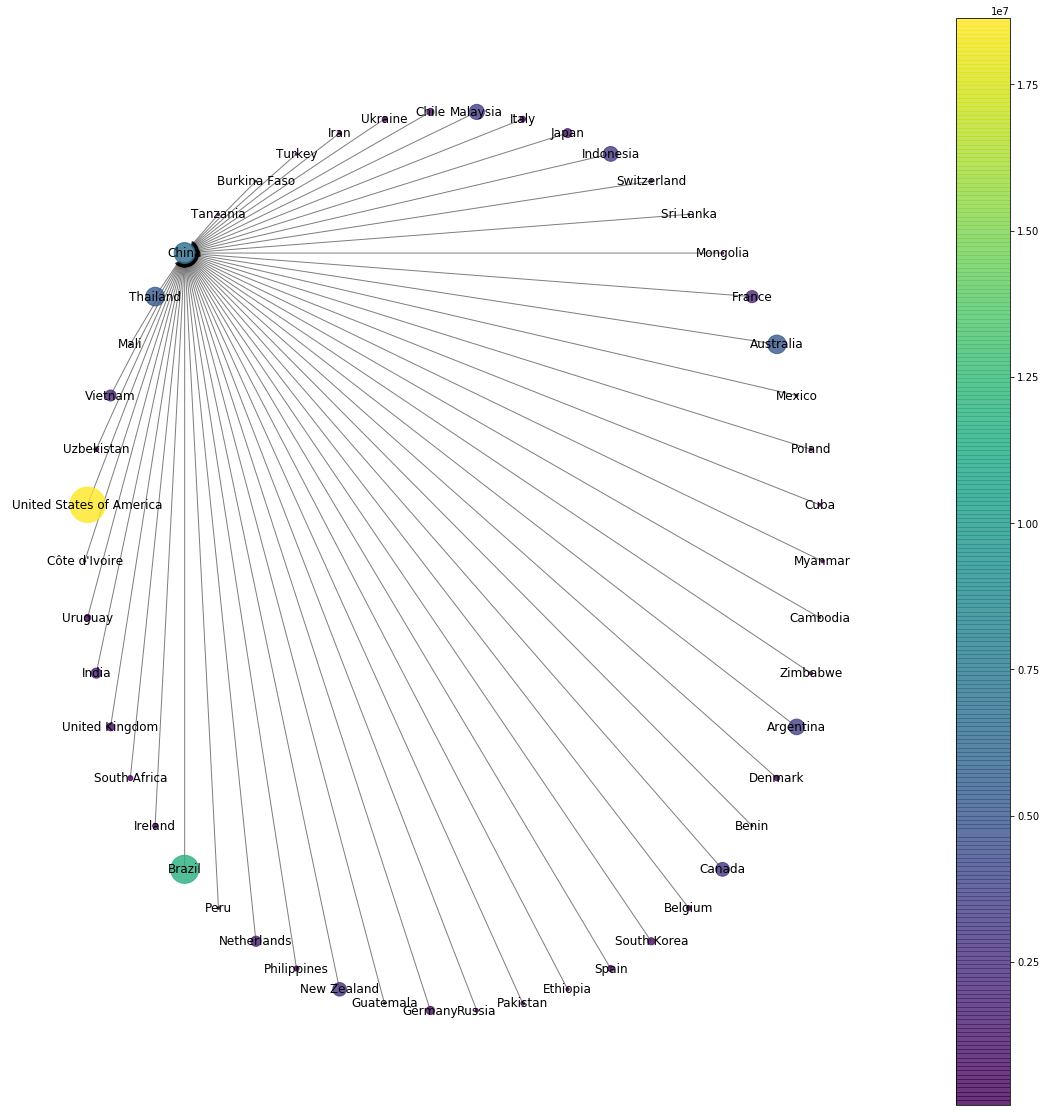

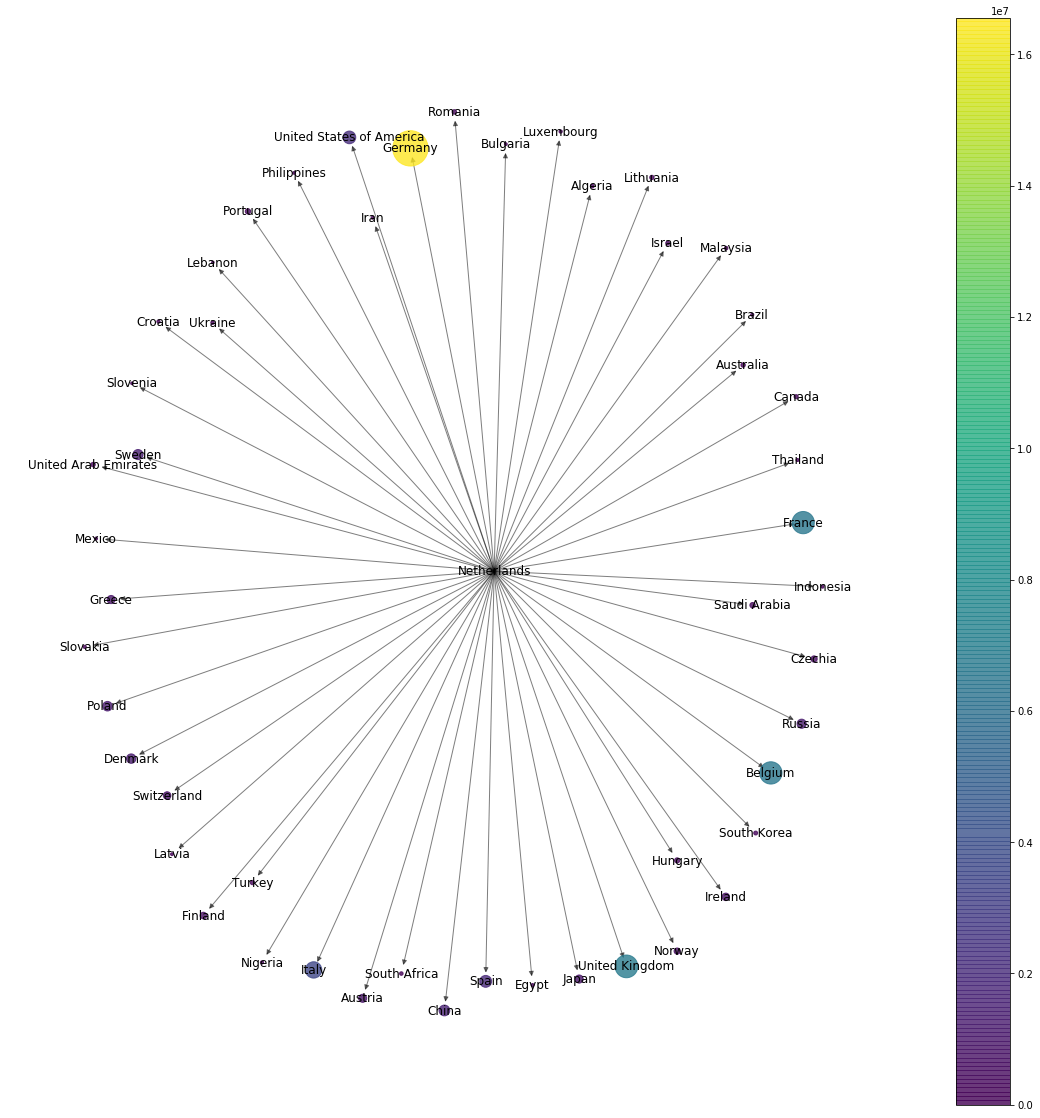

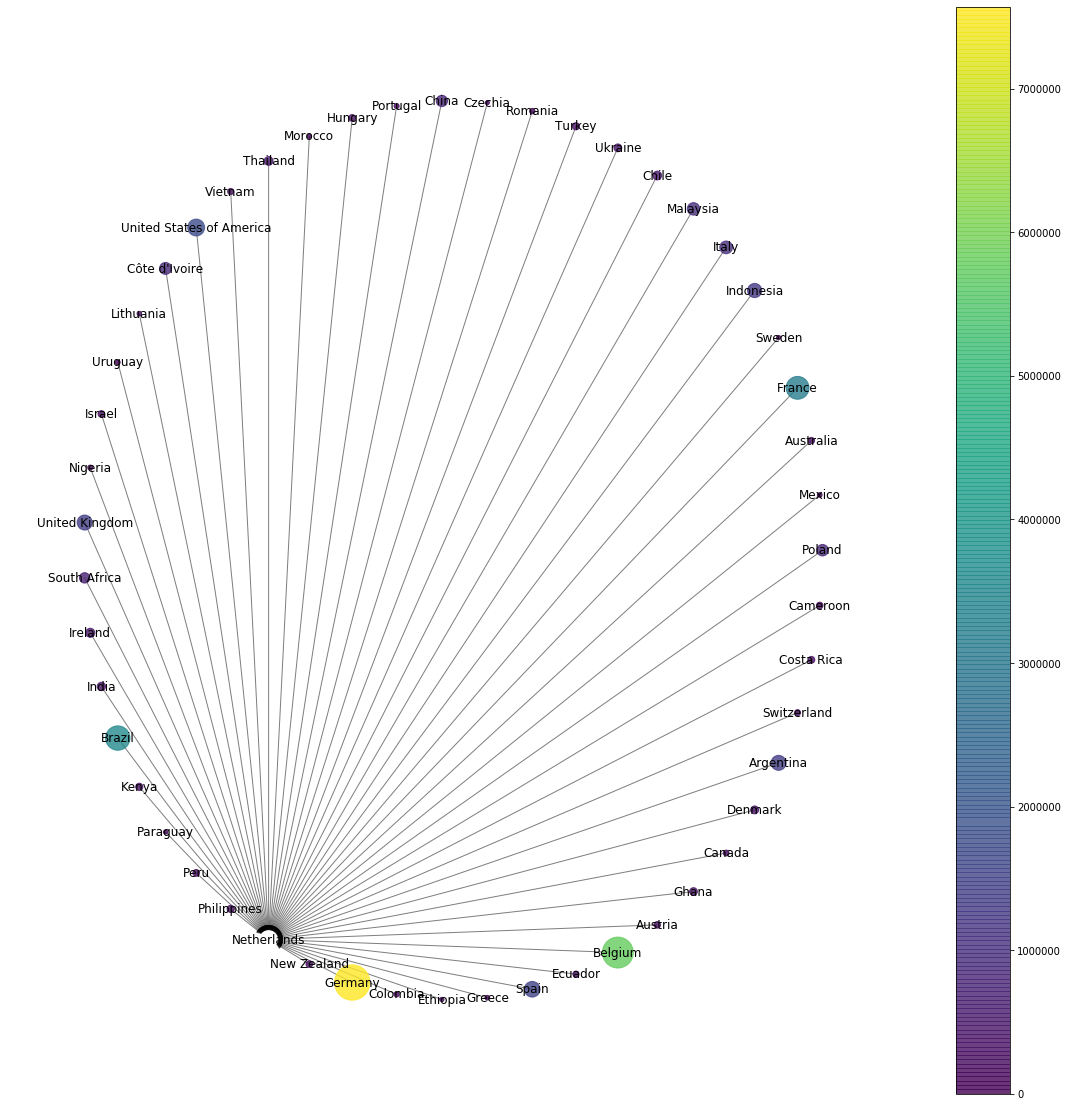

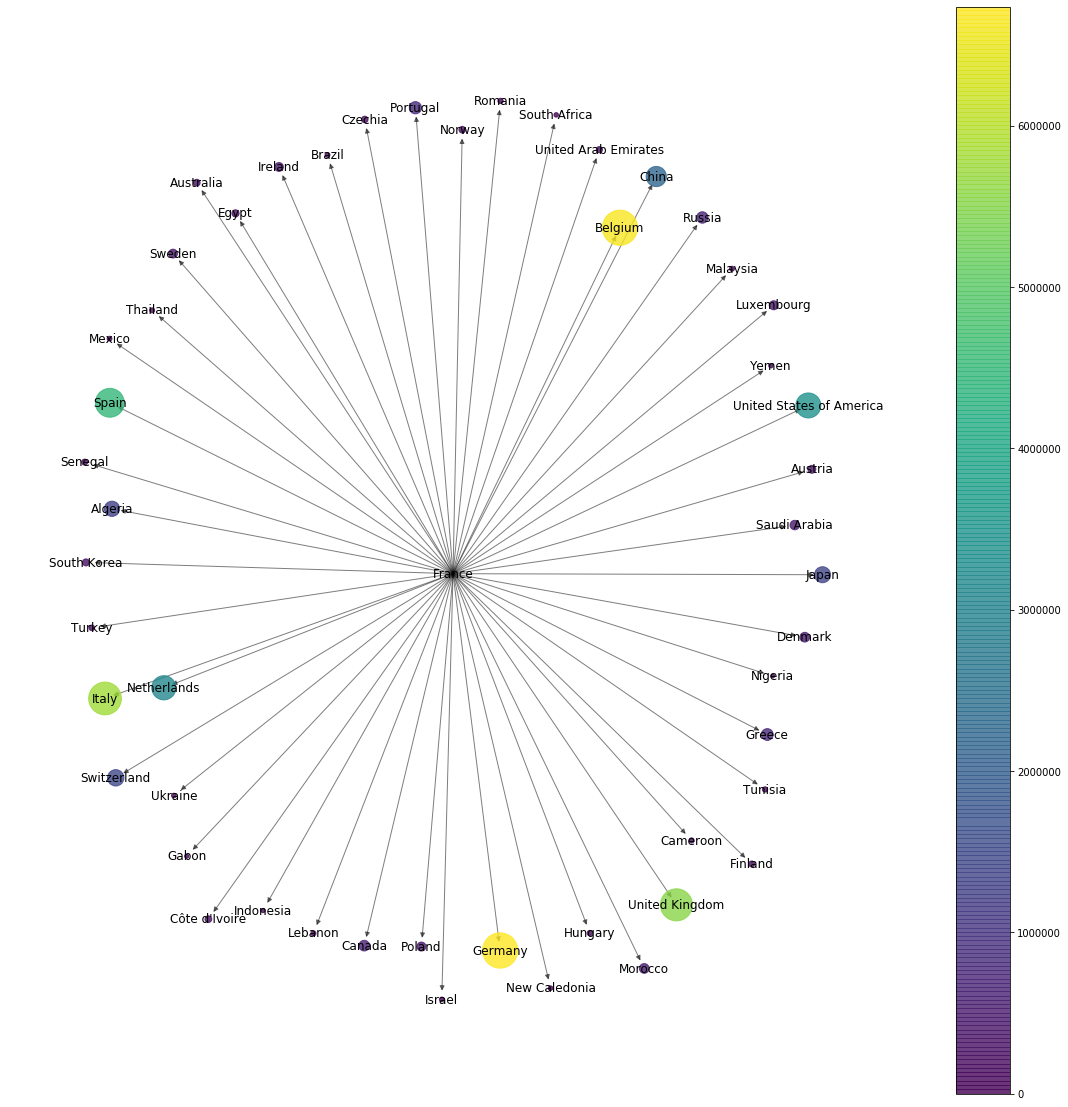

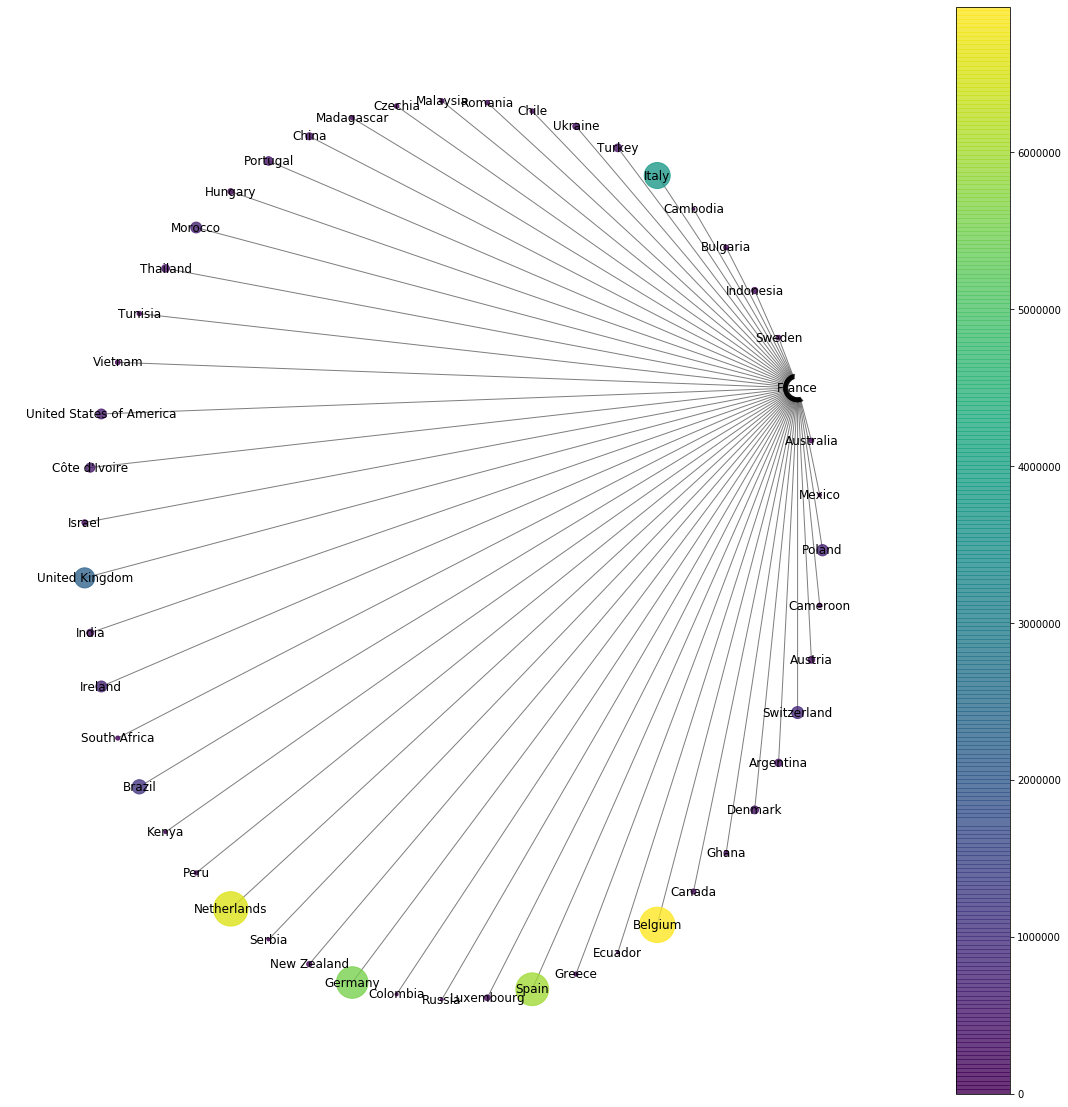

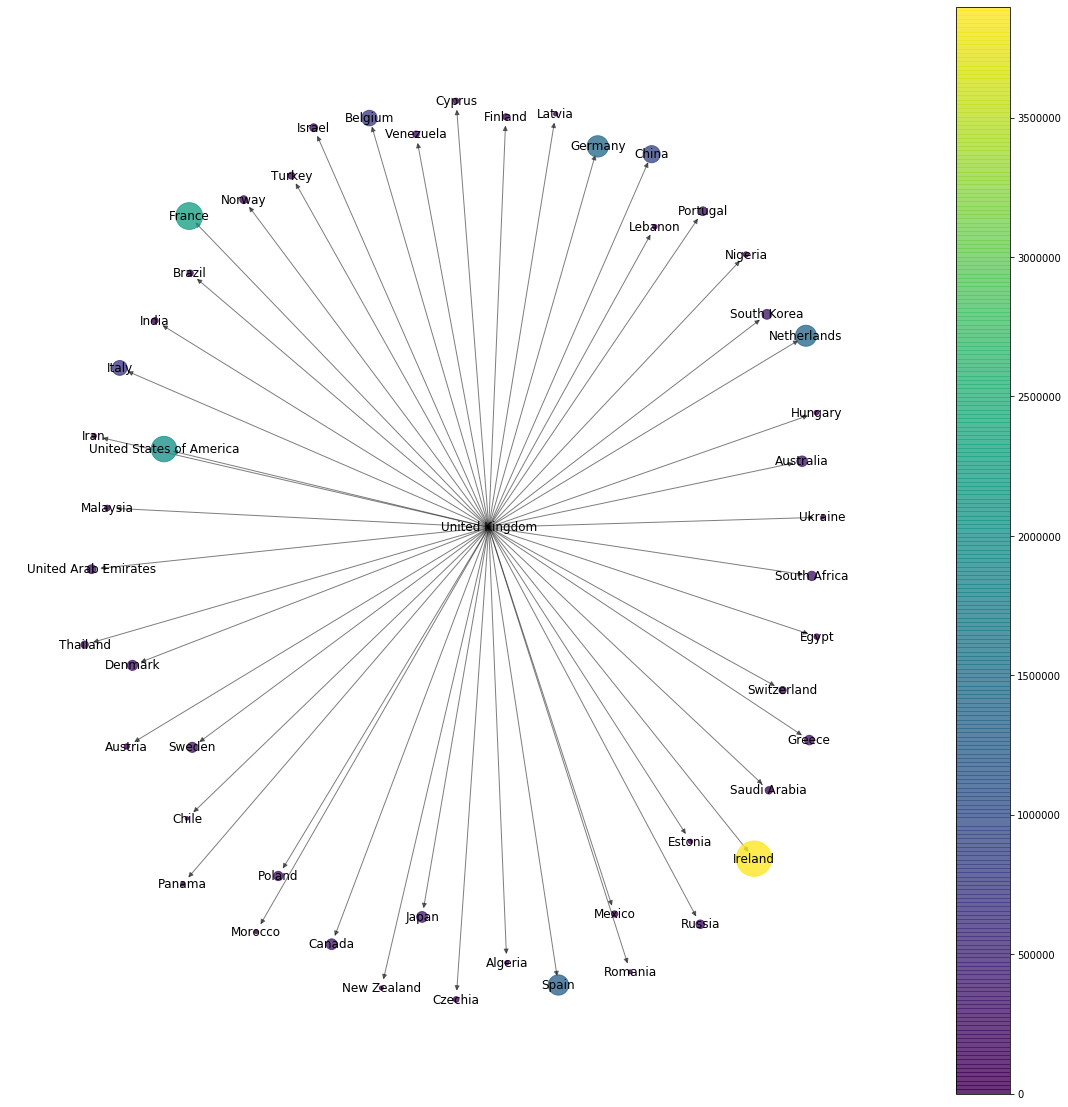

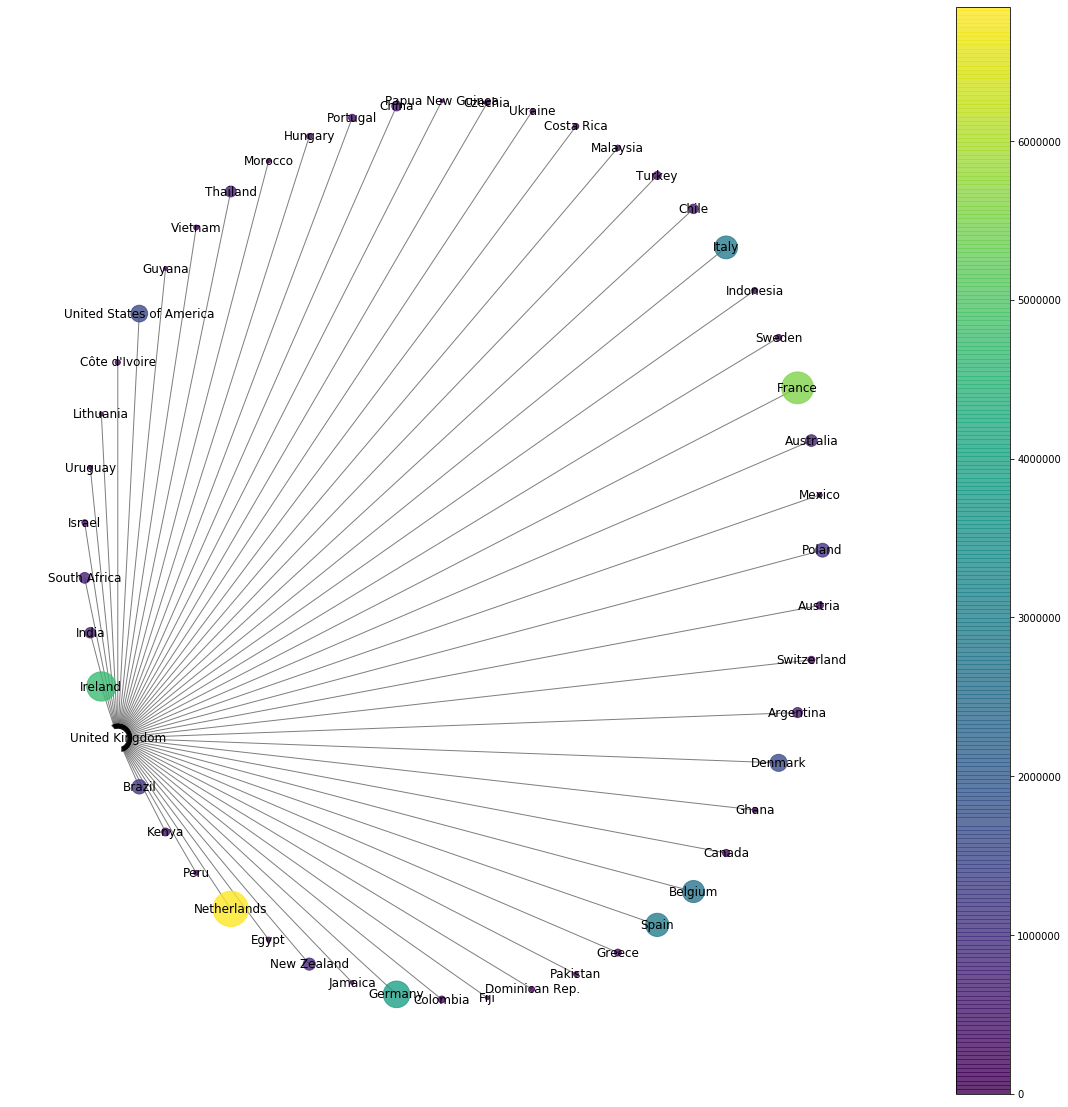

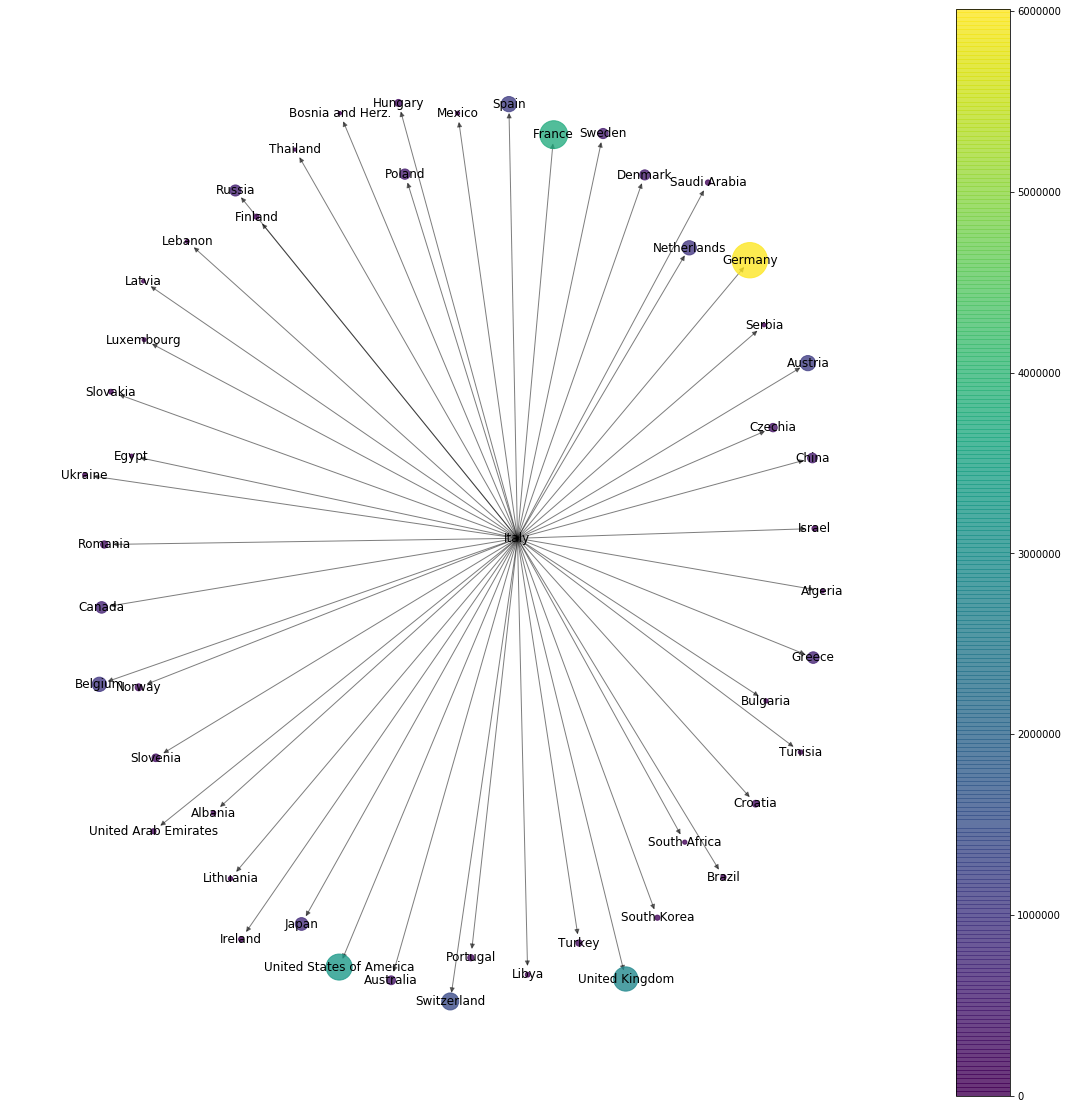

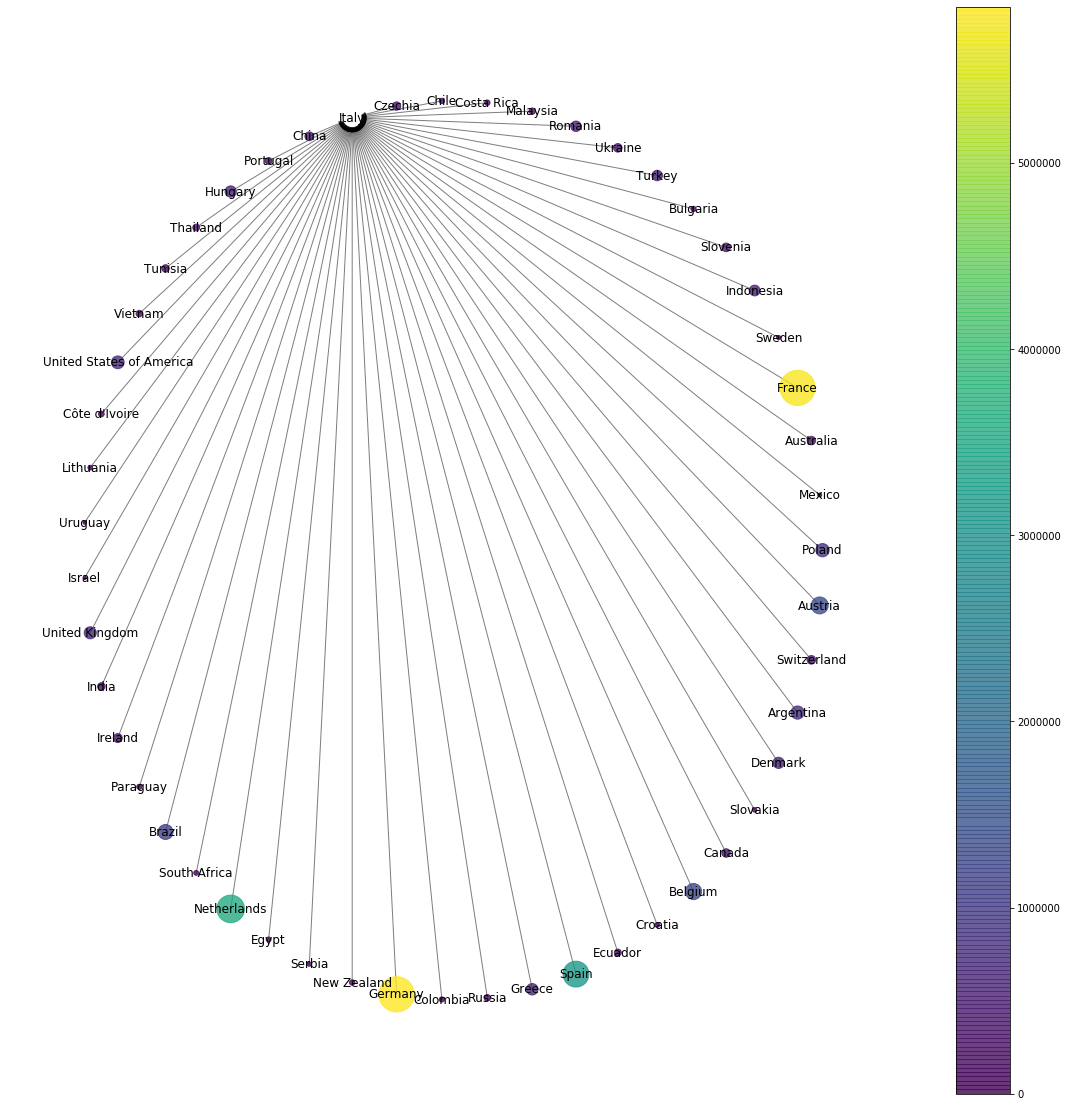

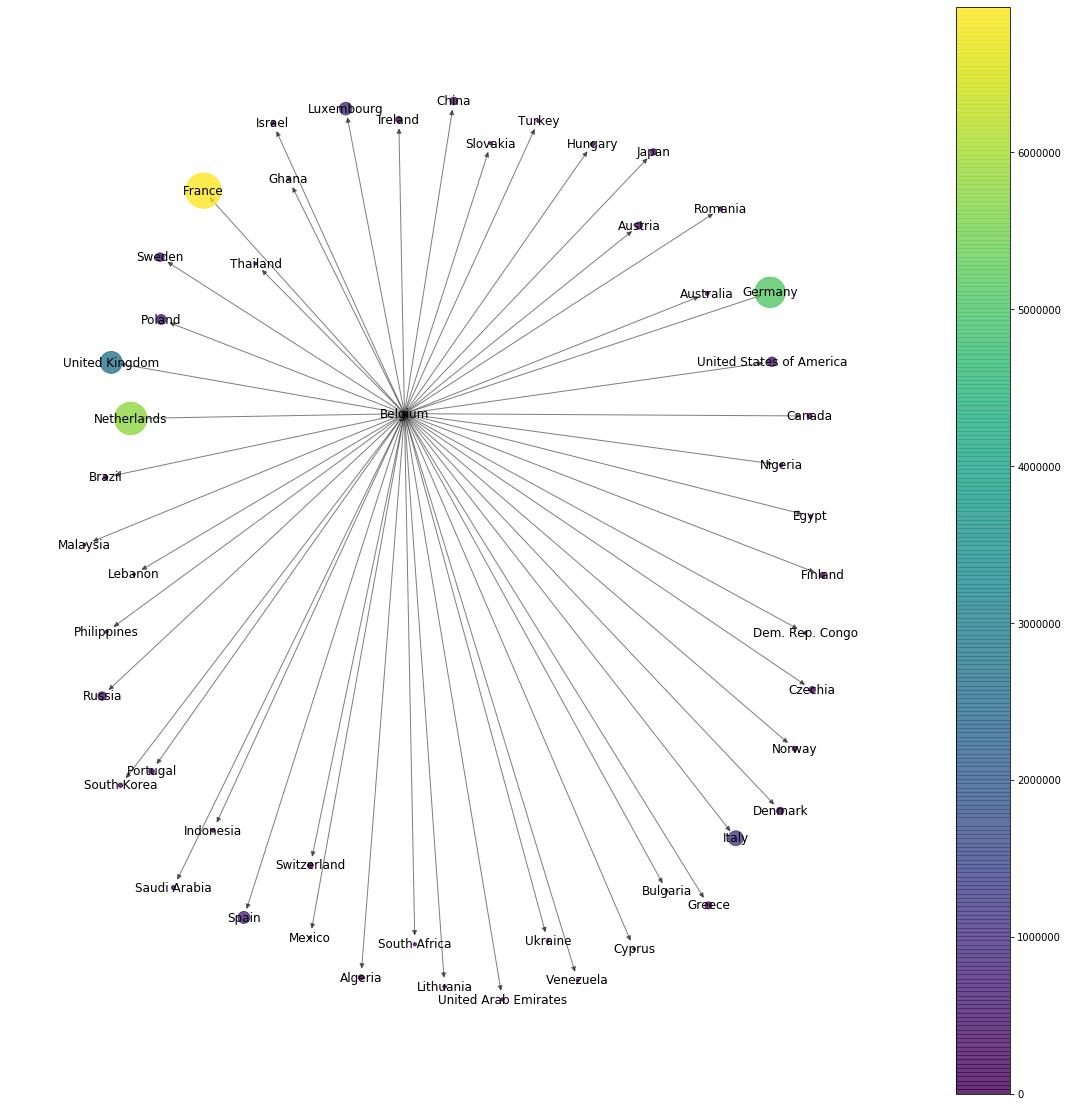

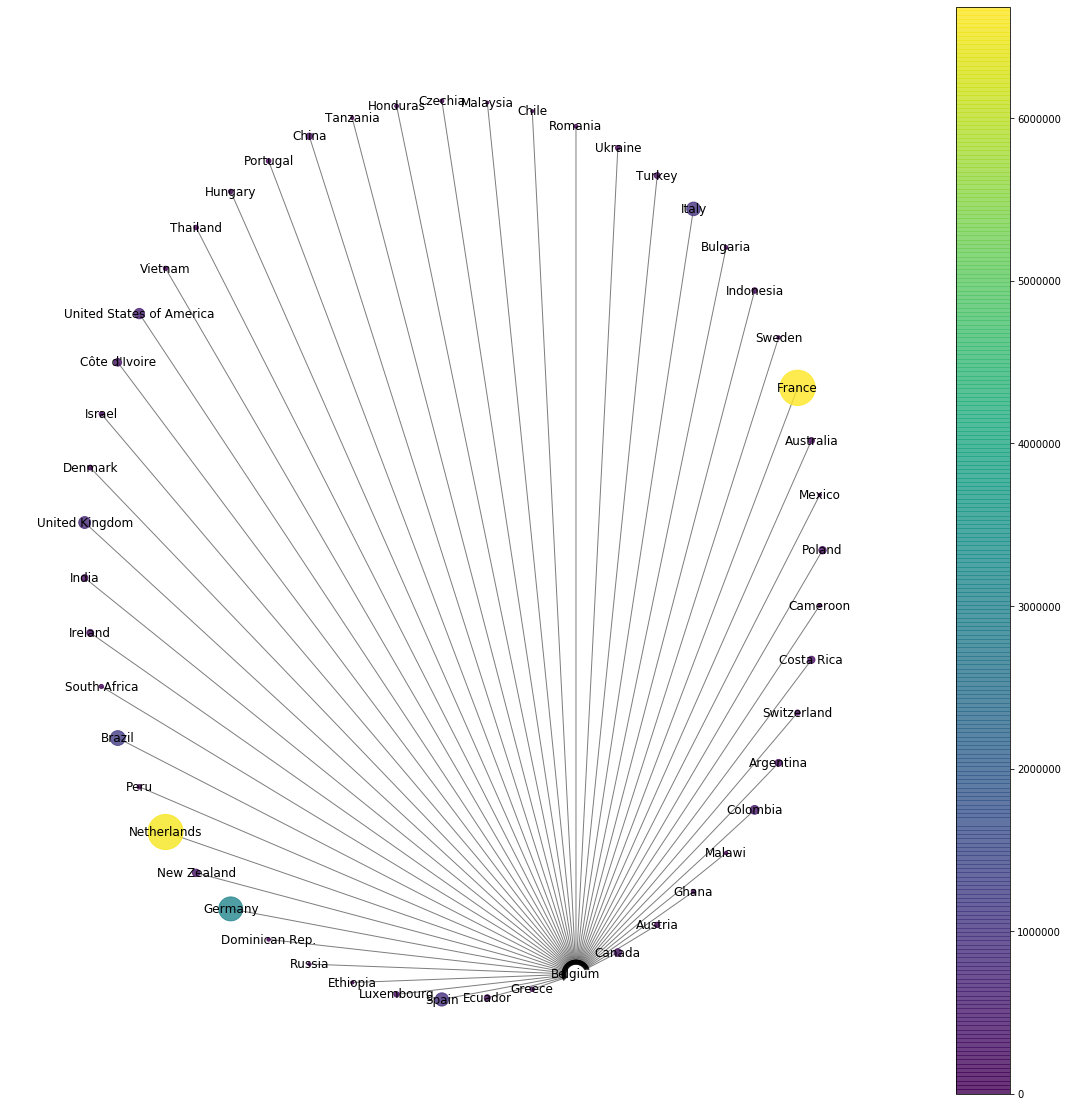

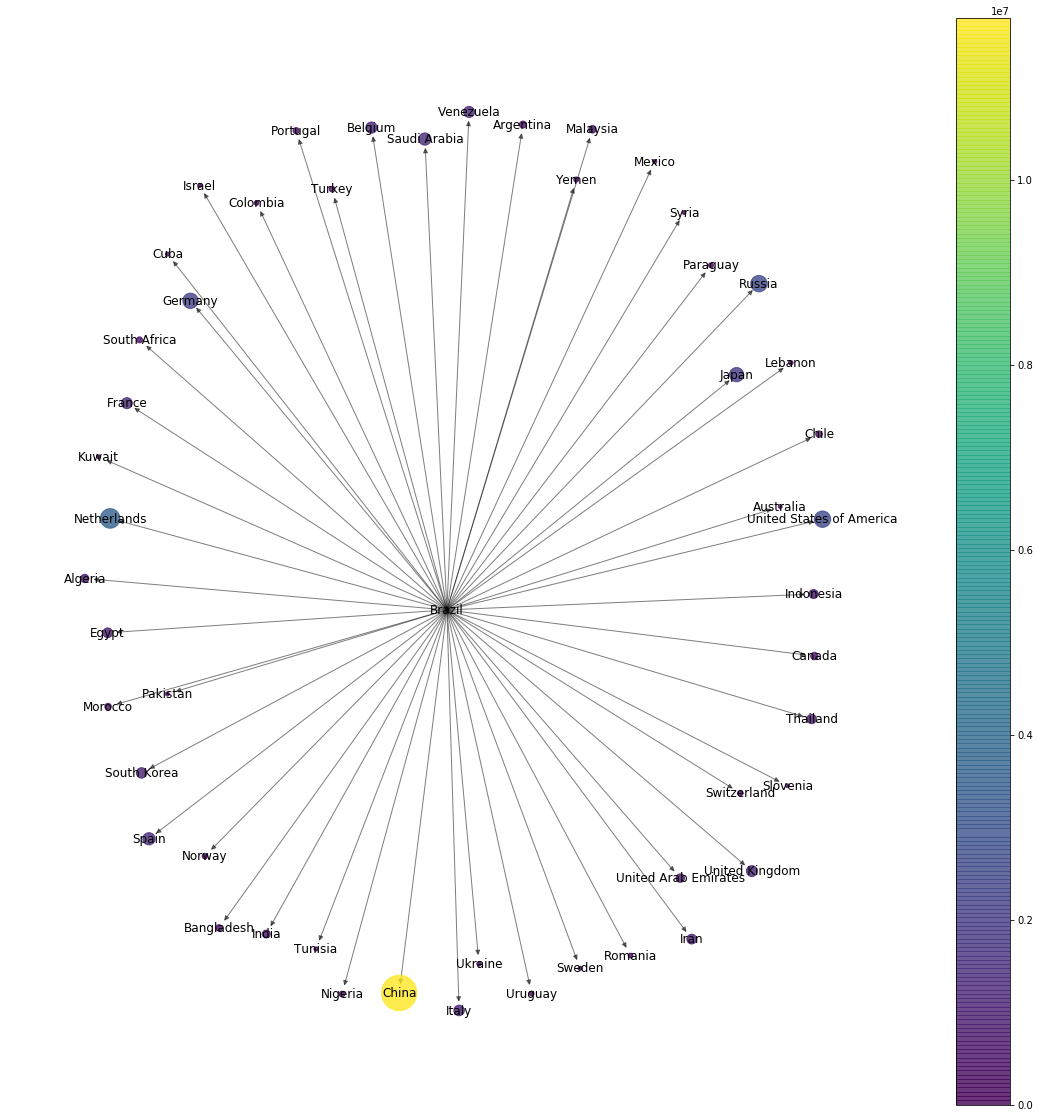

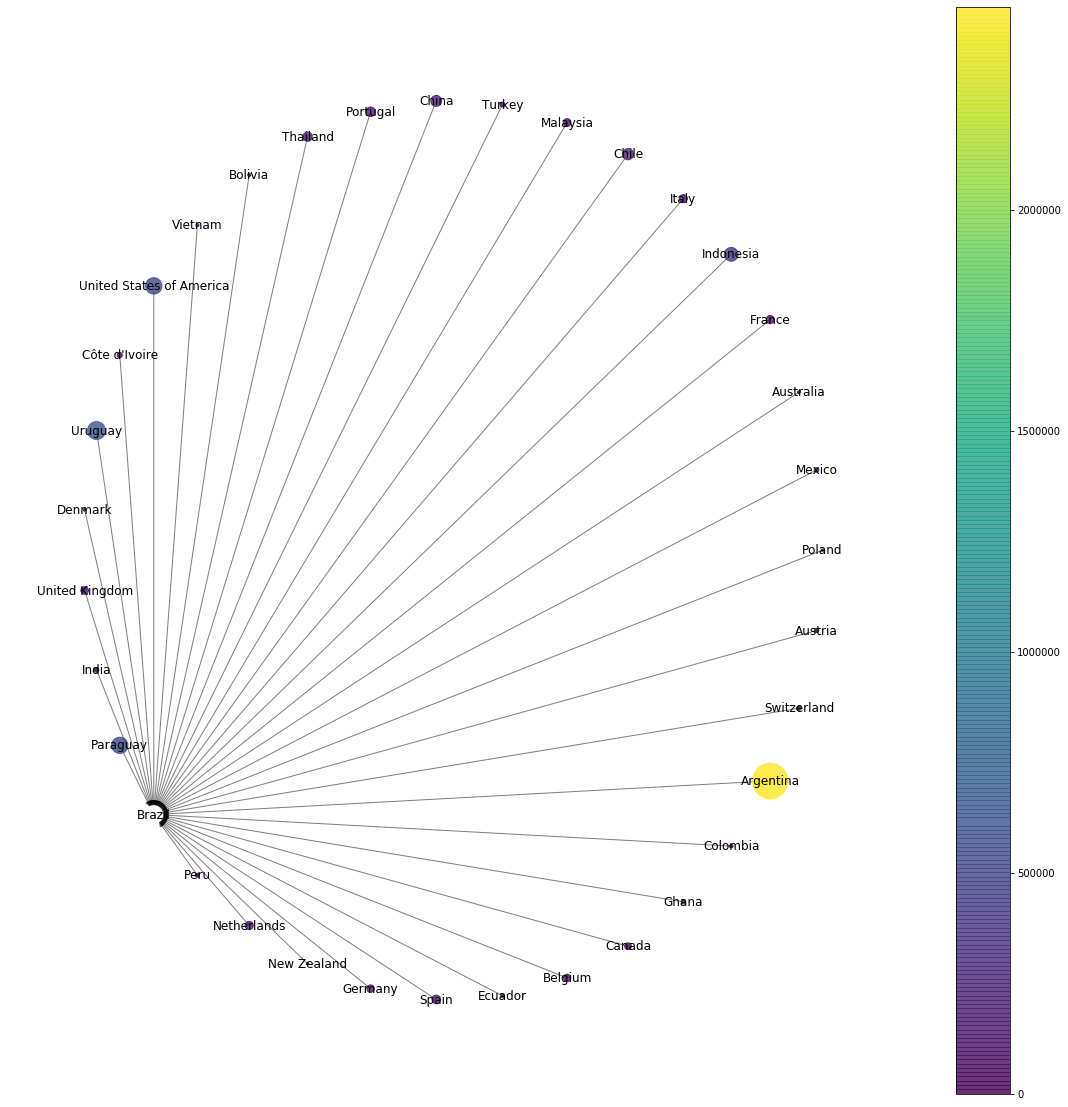

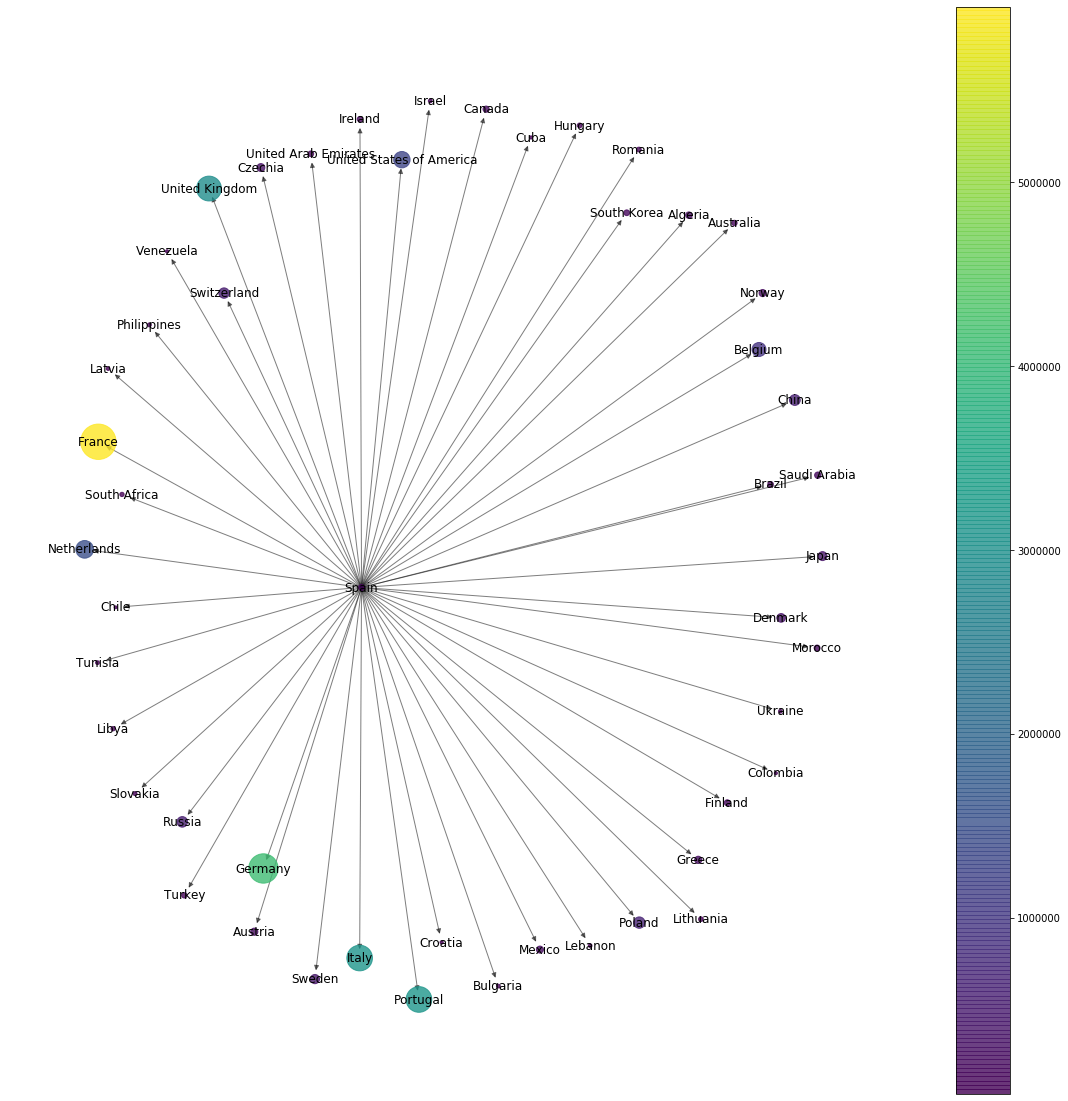

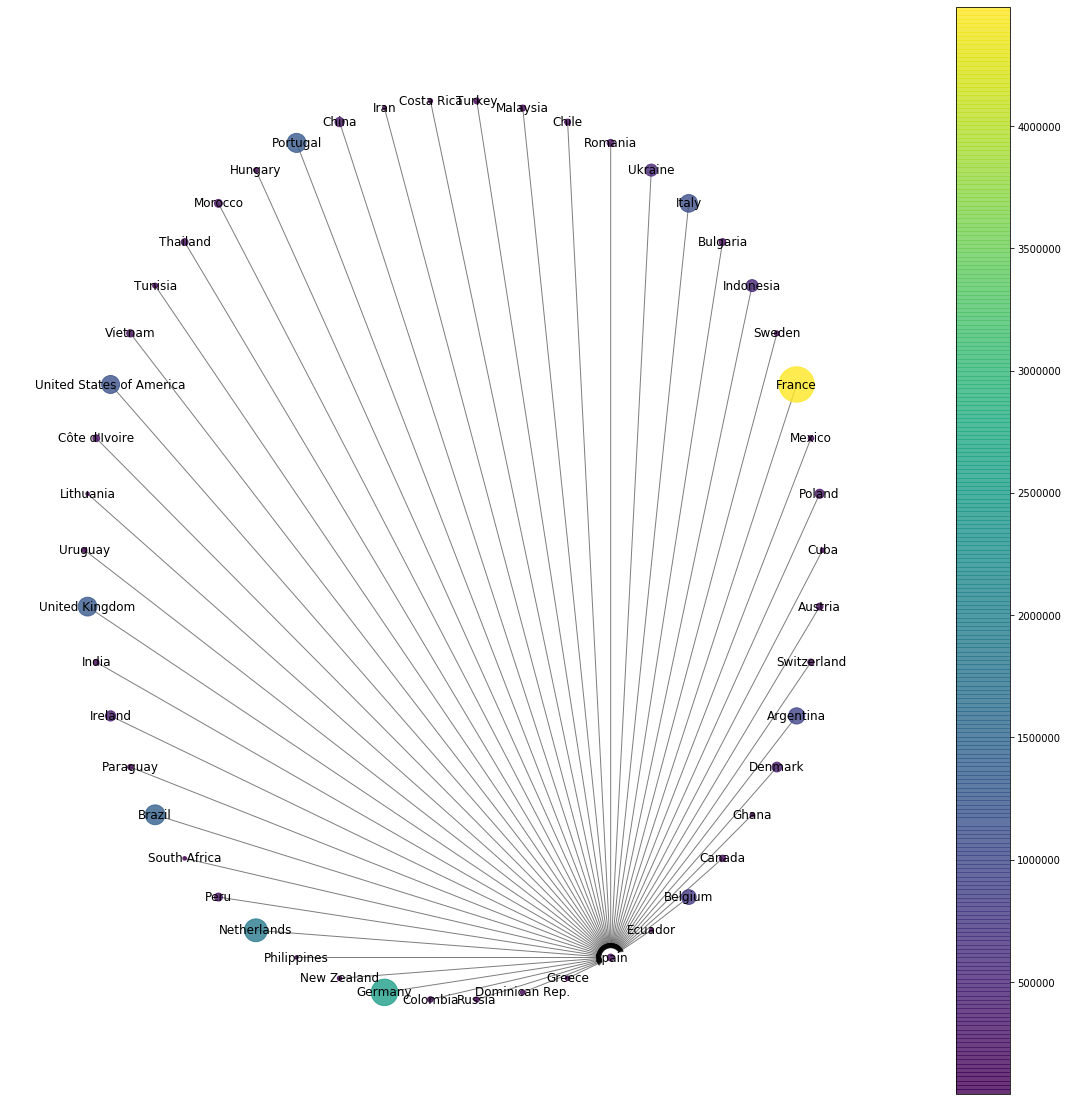

In [475]:
for i in tot.head(10).index:
    country=i
    yc = mat[(mat.reset_index().From==country).values].sort_values(['Value'], ascending=False)
    top50yc = yc.iloc[:50]
    countries = set(top50yc.reset_index().From.values).union(top50yc.reset_index().To.values)

    sum_from = mat.groupby('From').sum()
    sum_to = mat.groupby('To').sum()
    tot = sum_from.merge(sum_to.Value, how='outer', left_index=True, right_index=True).sum(axis=1).sort_values(ascending=False)
    #color = tot.divide(tot.max())

    YC = nx.DiGraph()
    YC.add_nodes_from(countries)
    YC.add_weighted_edges_from(top50yc.reset_index().values)

    data = top50yc.Value.reset_index().drop('From', axis=1).set_index('To')
    to = pd.Series(data['Value'], index=data.index)
    try:
        to[country]
    except:
        to = to.append(pd.Series([0], index=[country]))

    nx.set_node_attributes(YC, tot, 'Total')
    nx.set_node_attributes(YC, to, 'To')

    m = max([YC[u][v]['weight'] for u,v in YC.edges()])
    mto = max([YC.nodes[n]['To'] for n in YC.nodes()])
    #[G[u][v]['weight']/m*100 for u,v in G.edges()]

    plt.figure(figsize=(20,20)) 
    pos = nx.spring_layout(YC)
    ec = nx.draw_networkx_edges(YC, pos, alpha=0.5,edgelist=YC.edges(), width=1, with_labels=True)
    nc = nx.draw_networkx_nodes(YC, pos, nodelist=YC.nodes(), with_labels=True, node_color=[YC.nodes[n]["To"] for n in YC.nodes()],
                                node_size=[YC.nodes[n]["To"] for n in YC.nodes()]/mto*5000, alpha=0.8, node_shape = '.')
    labels = nx.draw_networkx_labels(YC,pos)
    plt.colorbar(nc)
    plt.axis('off')
    plt.savefig(country + '_export'+'.png')
    
    yc = mat[(mat.reset_index().To==country).values].sort_values(['Value'], ascending=False)
    top50yc = yc.iloc[:50]
    countries = set(top50yc.reset_index().From.values).union(top50yc.reset_index().To.values)

    YC = nx.DiGraph()
    YC.add_nodes_from(countries)
    YC.add_weighted_edges_from(top50yc.reset_index().values)

    data = top50yc.Value.reset_index().drop('To', axis=1).set_index('From')
    fro = pd.Series(data['Value'], index=data.index)
    try:
        fro[country]
    except:
        fro = fro.append(pd.Series([0], index=[country]))

    nx.set_node_attributes(YC, tot, 'Total')
    nx.set_node_attributes(YC, fro, 'From')

    m = max([YC[u][v]['weight'] for u,v in YC.edges()])
    mto = max([YC.nodes[n]['From'] for n in YC.nodes()])
    #[G[u][v]['weight']/m*100 for u,v in G.edges()]

    plt.figure(figsize=(20,20)) 
    pos = nx.shell_layout(YC)
    ec = nx.draw_networkx_edges(YC, pos, alpha=0.5,edgelist=YC.edges(), width=1, with_labels=True)
    nc = nx.draw_networkx_nodes(YC, pos, nodelist=YC.nodes(), with_labels=True, node_color=[YC.nodes[n]["From"] for n in YC.nodes()],
                                node_size=[YC.nodes[n]["From"] for n in YC.nodes()]/mto*5000, alpha=0.8, node_shape = '.')
    labels = nx.draw_networkx_labels(YC,pos)
    plt.colorbar(nc)
    plt.axis('off')
    plt.savefig(country + '_import'+'.png')